# Previsão da demanda de vendas do Wallmart

Fundada em 1962 pelo empreendendor Sam Walton, o Wallmart é um dos maiores grupos de varejo do mundo, servindo a dezenas de países.

Através dos dados disponibilizados em https://www.kaggle.com/code/rutuspatel/walmart-sales-project/data, farei uma análise, um modelo de previsão das vendas semanais baseado nos dados disponibilizados.

## Bibliotecas

Primeiramente vamos baixar as bibliotecas utilizadas.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from numpy import genfromtxt
from scipy.stats import zscore
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from plotly import graph_objects as go
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold, cross_val_score
import math
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

## Análise e Limpeza dos dados

Primeiramente, vamos abrir utilizando pandas o dataframe, e analisar os dados fornecidos.

### Visualização

Usando a biblioteca visualizamos o dataframe.

Existem 8 colunas:

- Store: Loja 
- Date: data da venda
- Weekly_Sales :vendas semanais
- Holiday_Flag: Bandeira de feriado( 0 se não for, e 1 se for)
- Temperature: Temperatura
- Fuel_Price :Preço da gasolina na região
- CPI : Prevailing consumer price index traduzindo " índice preço prevalente do consumidor
- Unemployment : Desemprego na região.

Podemos visualizar o data frame usando as funções head(), info(), e shape, então usamos as funções isnull() e sum() para ver se possuem valores nulos.

In [2]:
df=pd.read_csv("Walmart_Store_sales.csv")

In [3]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
df.shape

(6435, 8)

In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df['ano'] = df['Date'].dt.year
df['mês'] = df['Date'].dt.month
df['dia'] = df['Date'].dt.day_name()


### Detectando Outliers

Outliers são valores que estão muito distantes da média de distribuição, podemos averiguar se possui muitos outliers utilizando a função plot e box, os outliers vão aparecer na forma de pontos fora da caixa,podemos então ver que possuem outliers, e seria melhor diminuir ou remover totalmente se possível.


<AxesSubplot:>

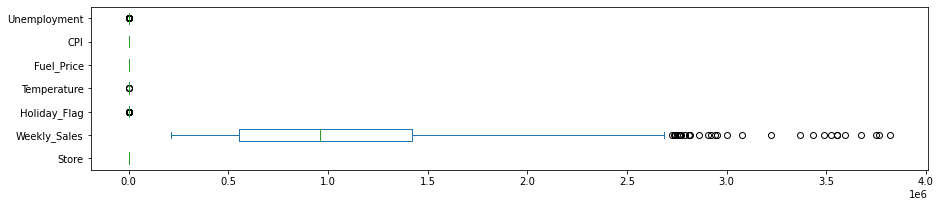

In [7]:
df.plot(kind='box', vert=False, figsize=(15, 3))

### Removendo Outliers

Para fazer isso, usamos o algoritimo IQR e então visualizamos de novo, e podemos notar uma quase total remoção dos outliers, então podemos analisar o que os mesmos dizem.

<AxesSubplot:>

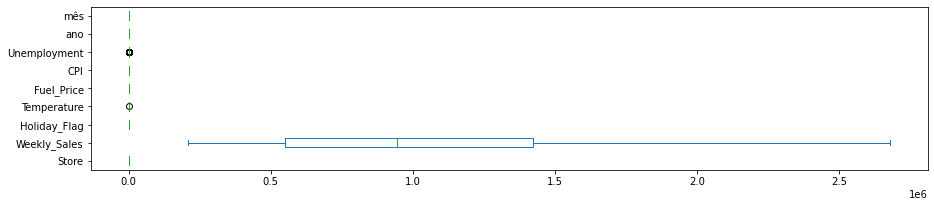

In [10]:
cols=['Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'] 
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df_2 = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_2.plot(kind='box', vert=False, figsize=(15, 3))

In [34]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5508 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         5508 non-null   int64         
 1   Date          5508 non-null   datetime64[ns]
 2   Weekly_Sales  5508 non-null   float64       
 3   Holiday_Flag  5508 non-null   int64         
 4   Temperature   5508 non-null   float64       
 5   Fuel_Price    5508 non-null   float64       
 6   CPI           5508 non-null   float64       
 7   Unemployment  5508 non-null   float64       
 8   ano           5508 non-null   int64         
 9   mês           5508 non-null   int64         
 10  dia           5508 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 645.4+ KB


## Visualização gráfica.

Usando as bibliotes seaborn e matplot, podemos visualizar graficamente a relação entre as colunas.Usando barplot, vemos a relação dos fatores com os anos,atrávés deles  podemos concluir:

- Entre 2010 e 2012, houve um aumento do combustível.
- Entre 2010 e 2012, houve uma queda nas vendas semanais.
- Entre 2010 e 2012, houve um aumento na temperatura.
- Entre 2010 e 2012, houve uma diminuição no desemprego.

<AxesSubplot:xlabel='ano', ylabel='Unemployment'>

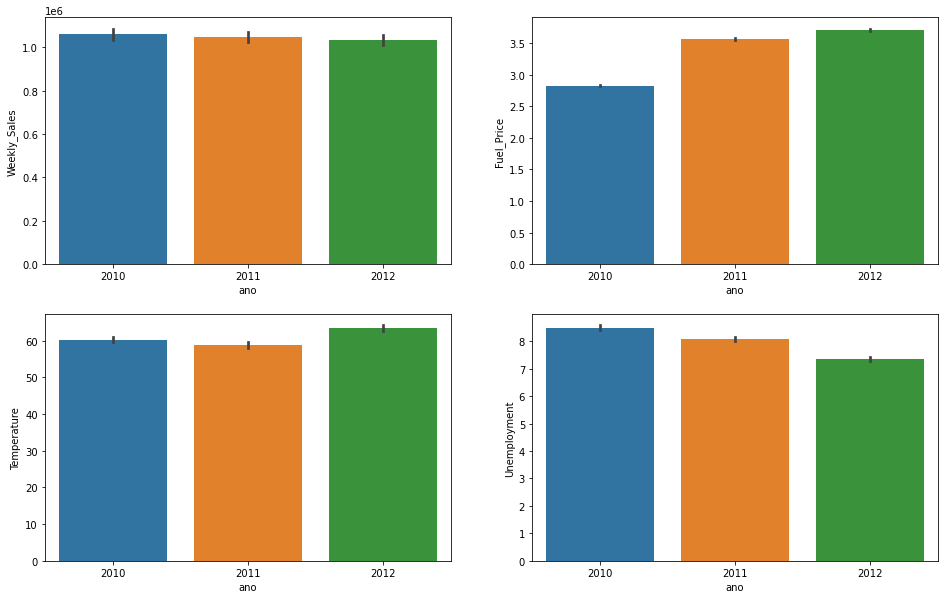

In [11]:
fig, ax = plt.subplots(2,2,figsize=(16,10))


sns.barplot(ax=ax[0][0],x=df['ano'],y=df['Weekly_Sales'])
sns.barplot(ax=ax[0][1],x=df['ano'],y=df['Fuel_Price'])
sns.barplot(ax=ax[1][0],x=df['ano'],y=df['Temperature'])
sns.barplot(ax=ax[1][1],x=df['ano'],y=df['Unemployment'])


<AxesSubplot:xlabel='ano', ylabel='Weekly_Sales'>

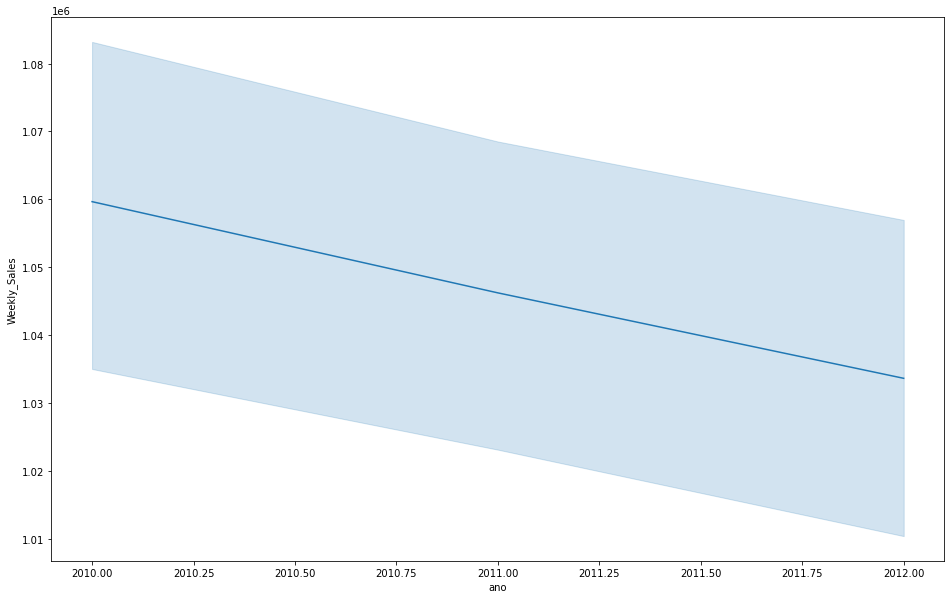

In [12]:
fig = plt.subplots(figsize=(16,10))


sns.lineplot(x=df['ano'],y=df['Weekly_Sales'])

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5508 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         5508 non-null   int64         
 1   Date          5508 non-null   datetime64[ns]
 2   Weekly_Sales  5508 non-null   float64       
 3   Holiday_Flag  5508 non-null   int64         
 4   Temperature   5508 non-null   float64       
 5   Fuel_Price    5508 non-null   float64       
 6   CPI           5508 non-null   float64       
 7   Unemployment  5508 non-null   float64       
 8   ano           5508 non-null   int64         
 9   mês           5508 non-null   int64         
 10  dia           5508 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 645.4+ KB


<AxesSubplot:xlabel='ano', ylabel='Temperature'>

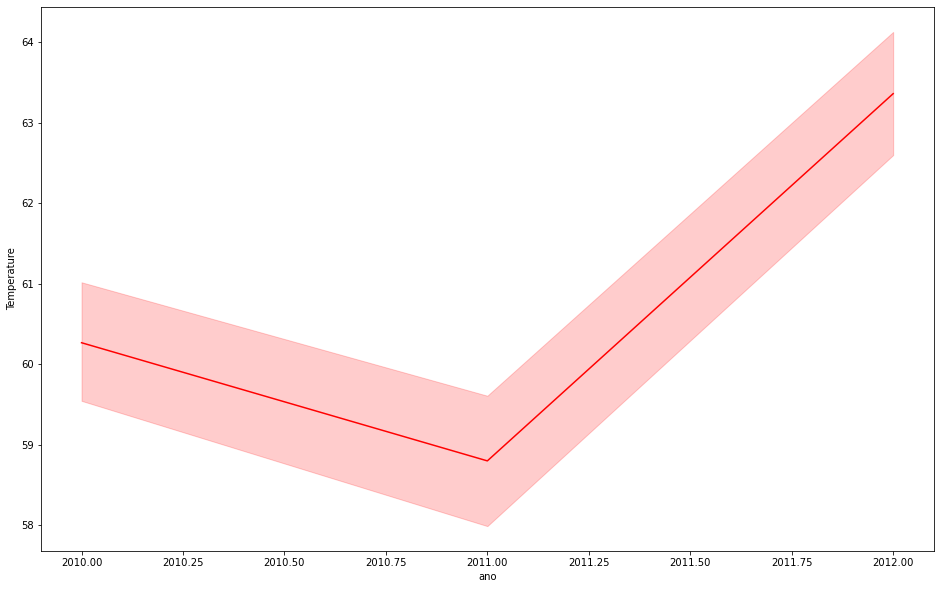

In [13]:
fig = plt.subplots(figsize=(16,10))


sns.lineplot(x=df['ano'],y=df['Temperature'],color="red")

<AxesSubplot:xlabel='ano', ylabel='Unemployment'>

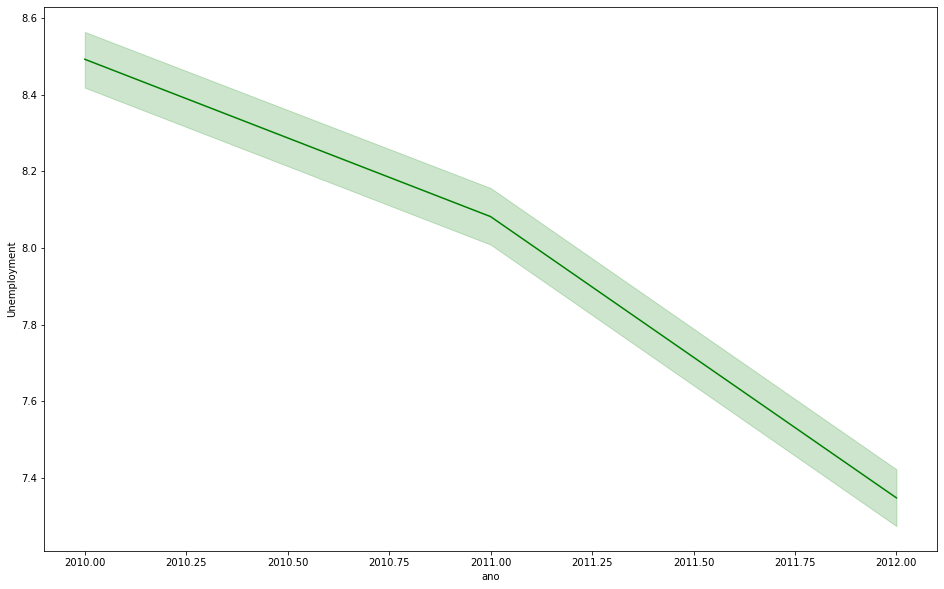

In [35]:
fig = plt.subplots(figsize=(16,10))


sns.lineplot(x=df['ano'],y=df['Unemployment'],color="green")

Usando a função pairplot(), podemos então visualizar que as relações não são tão óbvias entre as colunas.

<Figure size 2160x864 with 0 Axes>

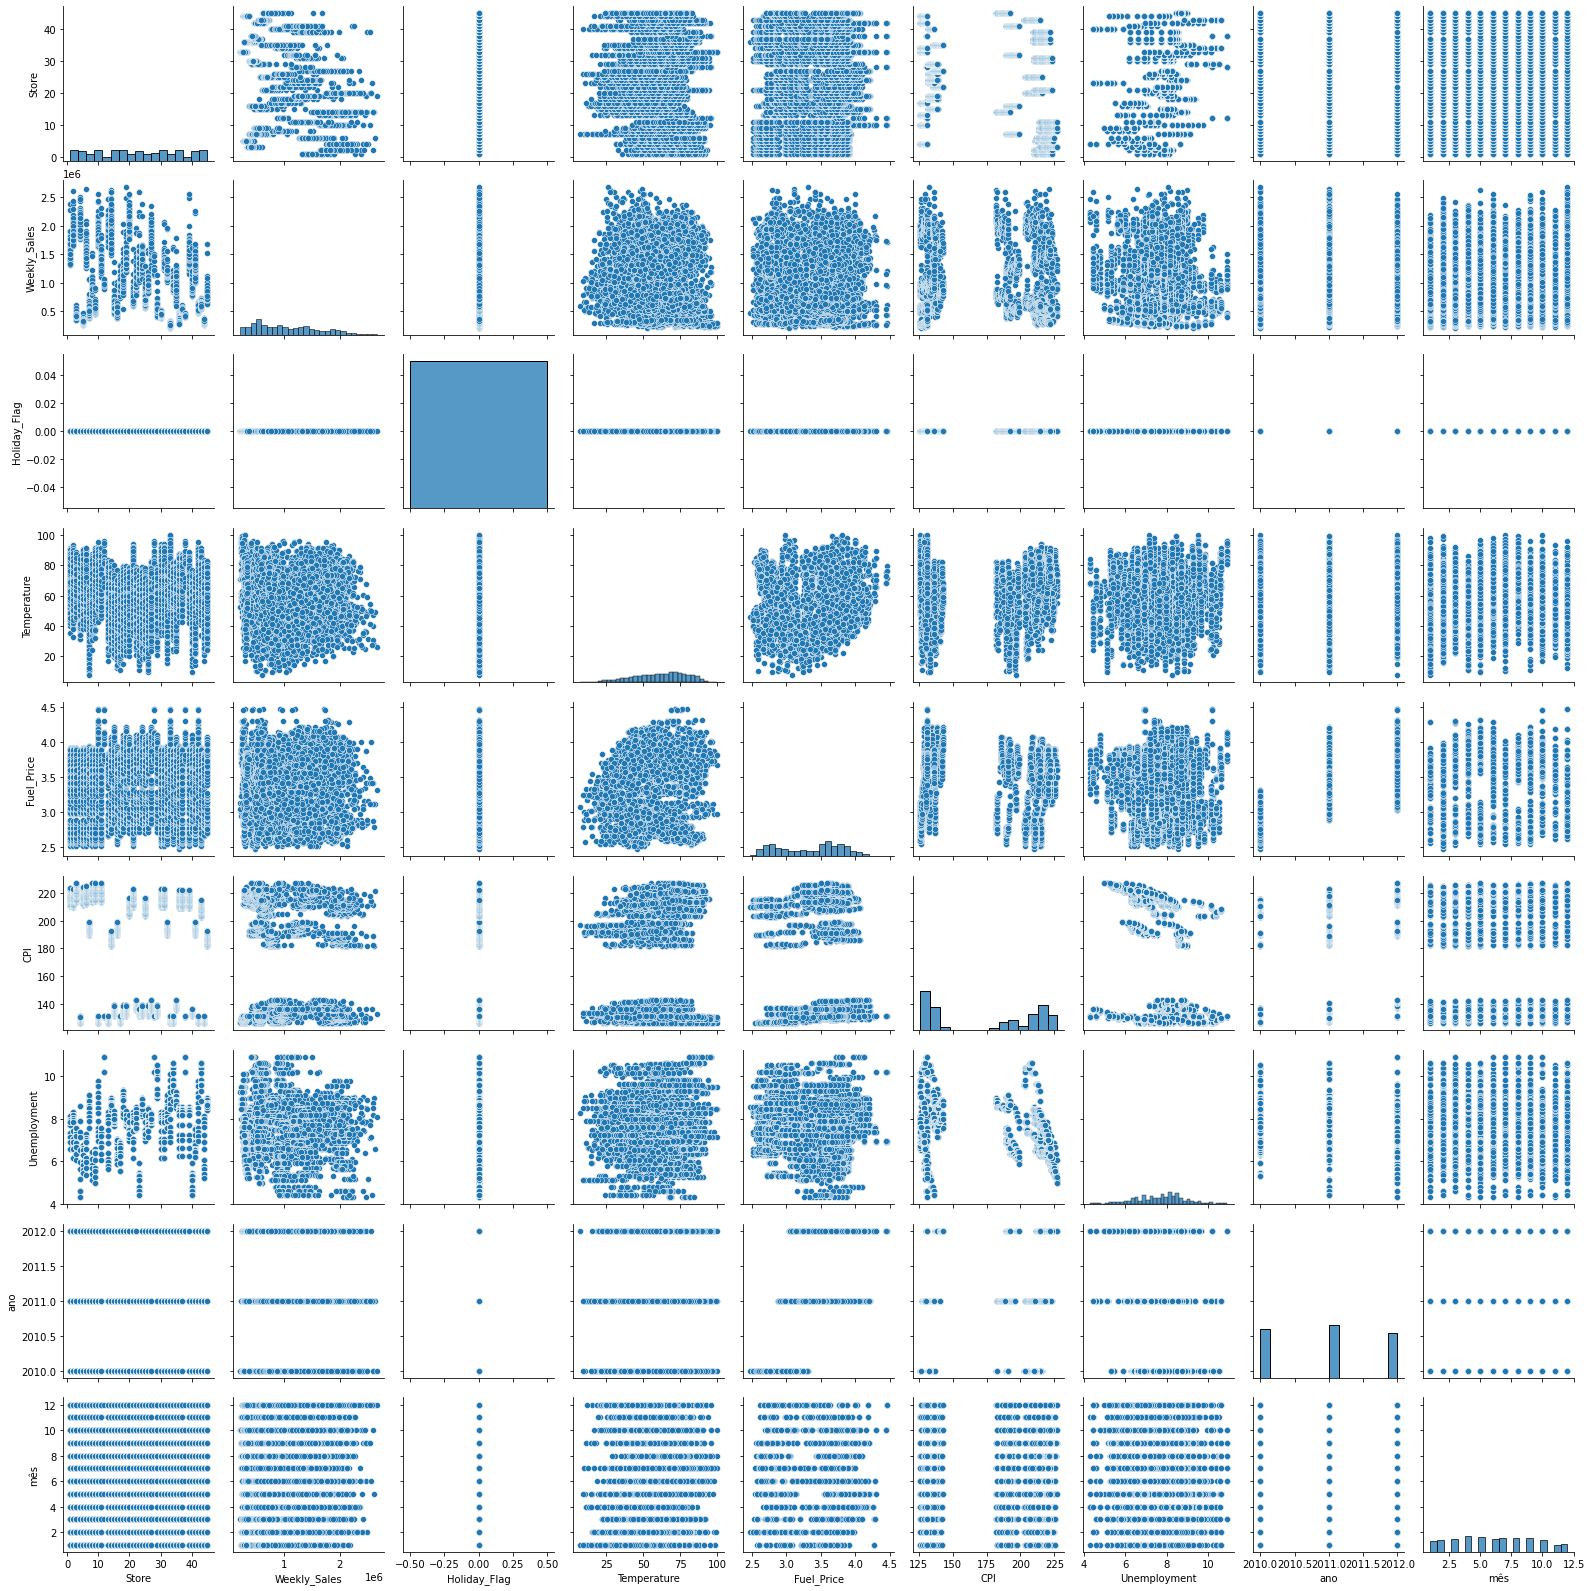

In [14]:
plt.figure(figsize=(30,12))
sns.pairplot(df_2)

## Machine Learning

Usando algorítimos de aprendizagem de máquina, podemos então, testar diversas abordagems para averiguar qual o melhor modelo encontrado, para isso, ultilizaremos a métrica do score R2,esta sendo uma medida de ajuste de um modelo estatístico linear generalizado, como a regressão linear simples ou múltipla, aos valores observados de uma variável aleatória. O R2 varia entre 0 e 1,quanto mais próximo de 1, melhor o modelo.

Os algorítimos testados são:

- LinearRegression()
- RandomForestRegressor()
- KNeighborsRegressor
- DecisionTreeRegressor()

### LinearRegression()

In [ ]:
X=df_2.drop(['Weekly_Sales','Date','ano','mês','dia'], axis=1)
y=df_2["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
print("O score R2 é:",metrics.r2_score(y_test,y_pred))

### DecisionTreeRegressor()

In [40]:
X=df_2.drop(['Weekly_Sales','Date','ano','mês','dia'], axis=1)
y=df_2["Weekly_Sales"]

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.20, random_state=0)

regr_4 = DecisionTreeRegressor(max_depth=20,random_state=0)
regr_4.fit(X_train_4, y_train_4)
y_pred_4=regr.predict(X_test_4)
print("O score R2 é:",metrics.r2_score(y_test_4,y_pred_4))

O score R2 é: 0.1263725868552631


### RandomForestRegressor()

In [41]:
X=df_2.drop(['Weekly_Sales','Date','ano','mês','dia'], axis=1)
y=df_2["Weekly_Sales"]



X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.20, random_state=0)

regr_2 = RandomForestRegressor(max_depth=20, random_state=0)
regr_2.fit(X_train_2, y_train_2)
y_pred_2=regr_2.predict(X_test_2)
print("O score R2 é:",metrics.r2_score(y_test_2,y_pred_2))


O score R2 é: 0.9611817063144344


### KNeighborsRegressor()

In [30]:

X=df_2.drop(['Weekly_Sales','Date','ano','mês','dia'], axis=1)
y=df_2["Weekly_Sales"]



X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.20, random_state=0)

regr_3 = KNeighborsRegressor(n_neighbors=2)
regr_3.fit(X_train_3, y_train_3)
y_pred_3=regr_3.predict(X_test_3)
print("O score R2 é:",metrics.r2_score(y_test_3,y_pred_3))

O score R2 é: 0.7629096956856127


## Conclusão:

Ao analisarmos os diferentes algorítimos, podemos concluir que: LinearRegression(), e DecisionTreeRegression() possuem scores muito baixas, portanto não são modelos adequados, por outro lado, KNeighborsRegressor() possui um score razoável, e a melhor score disparada é a do algorítimo RandomForestRegressor(), este possuindo uma score de 0,96 e sendo assim um modelo bom para prever o resultado das vendas semanais.